# 심부전증 예방 데이터셋으로 머신러닝 모델링하기

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### 1. EDA / 기초통계 분석

- age: 환자의 나이
- anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
- creatinine_phosphokinase: 크레아틴키나제 검사 결과
- diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
- ejection_fraction: 박출계수 (%) - 심장의 펌프기능을 나타내는 지표의 하나
- high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
- platelets: 혈소판 수 (kiloplatelets/mL) - 지혈과 혈액 응고에 필수적인 역할 
- serum_creatinine: 혈중 크레아틴 레벨 (mg/dL) - 근육 운동의 에너지를 만드는 데 필요한 화합물
- serum_sodium: 혈중 나트륨 레벨 (mEq/L)
- sex: 성별 (0: 여성, 1: 남성)
- smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
- time: 관찰 기간 (일)
- DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)


In [2]:
df = pd.read_csv('C:/my_web/machine_lecture/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
print('DEATH_EVENT:\n', df['DEATH_EVENT'].value_counts()) # target값이 생존에 치우쳐져 있음을 알 수 있다. --> 정확도말고 다른 평가지표 쓰기!
print('\ndiabetes:\n', df['diabetes'].value_counts())
print('\nanaemia:\n', df['anaemia'].value_counts())
print('\nhigh_blood_pressure:\n', df['high_blood_pressure'].value_counts())
print('\nSex:\n', df['sex'].value_counts())


DEATH_EVENT:
 0    203
1     96
Name: DEATH_EVENT, dtype: int64

diabetes:
 0    174
1    125
Name: diabetes, dtype: int64

anaemia:
 0    170
1    129
Name: anaemia, dtype: int64

high_blood_pressure:
 0    194
1    105
Name: high_blood_pressure, dtype: int64

Sex:
 1    194
0    105
Name: sex, dtype: int64


In [53]:
print('\nsmoking:\n', df['smoking'].value_counts()) # 비흡연에 데이터가 쏠림
# print('\ntime:\n', df['time'].value_counts())


smoking:
 0    203
1     96
Name: smoking, dtype: int64


- 수치형 데이터의 히스토그램 

<AxesSubplot:xlabel='age', ylabel='Count'>

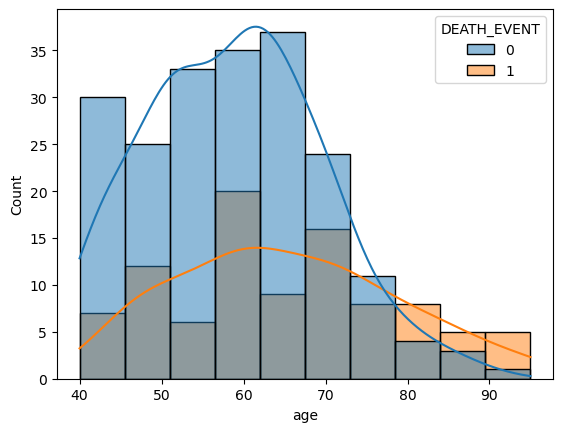

In [22]:
# seaborn의 histplot, jointplot, pairplot을 통해 히스토그램 그리기 
import seaborn as sns
sns.histplot(x = 'age', data = df, hue = 'DEATH_EVENT', kde = True) # 연령층에 따른 사망여부

<AxesSubplot:xlabel='ejection_fraction', ylabel='Count'>

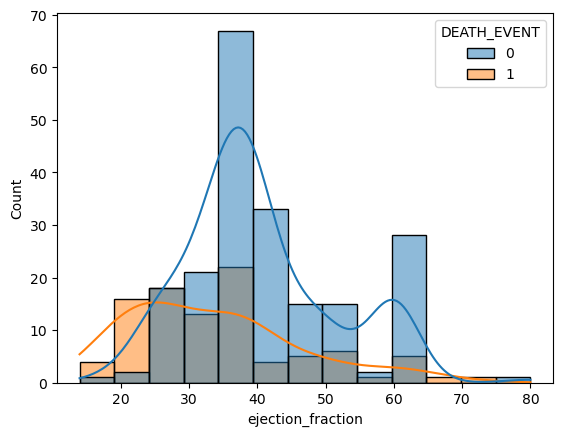

In [25]:
sns.histplot(x = 'ejection_fraction', data = df, bins = 13, hue = 'DEATH_EVENT', kde = True)

### 2. 전처리
- 결측치 제거 할 칼럼 없음
- 인코딩 할 칼럼 없음 

In [31]:
# 스케일링할 칼럼 확인
pd.Series(df.columns)

0                          age
1                      anaemia
2     creatinine_phosphokinase
3                     diabetes
4            ejection_fraction
5          high_blood_pressure
6                    platelets
7             serum_creatinine
8                 serum_sodium
9                          sex
10                     smoking
11                        time
12                 DEATH_EVENT
dtype: object

In [32]:
# 수치형, 범주형 나누기 
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]
X_cat = df[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']]
target = df['DEATH_EVENT'] 

In [33]:
# 수치형 스키일링 후 범주형과 합쳐주기 
ss = StandardScaler()
ss.fit(X_num)
scaled_X_num = ss.transform(X_num)
print(type(scaled_X_num)) # 스케일링 하면 ndarray로 바뀜 
scaled_X_num = pd.DataFrame(data = scaled_X_num, index = X_num.index, columns = X_num.columns) # 다시 df로 만들어주기(칼럼, 인덱스 잘 지정하기)
X = pd.concat([scaled_X_num, X_cat], axis = 1) # 수치형과 범주형 다시 합치기
X.head()

<class 'numpy.ndarray'>


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,1,1,0,0,0


### 4. 데이터 분할

In [36]:
X_train, X_valid, y_train, y_valid = train_test_split(X, target,
                                                      test_size = 0.3,
                                                      random_state = 1)

### 5. 모델링후 평가 

In [45]:
from sklearn.metrics import classification_report

# Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_valid)
acc_lr = accuracy_score(y_valid, pred_lr)
print('선형회귀 정확도: {0: .4f}'.format(acc_lr))
print('Logistic Regression 평가 :', classification_report(y_valid, pred_lr))


선형회귀 정확도:  0.7556
Logistic Regression 평가 :               precision    recall  f1-score   support

           0       0.78      0.92      0.84        64
           1       0.64      0.35      0.45        26

    accuracy                           0.76        90
   macro avg       0.71      0.63      0.65        90
weighted avg       0.74      0.76      0.73        90



In [47]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_valid)
acc_rf = accuracy_score(y_valid, pred_rf)
print('\nRandom Forest 정확도 : {0: .4f}'.format(acc_rf))
print('Random Forest 평가 :\n', classification_report(y_valid, pred_rf))


Random Forest 정확도 :  0.7778
Random Forest 평가 :
               precision    recall  f1-score   support

           0       0.81      0.91      0.85        64
           1       0.67      0.46      0.55        26

    accuracy                           0.78        90
   macro avg       0.74      0.68      0.70        90
weighted avg       0.77      0.78      0.76        90



In [49]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred_tree = tree.predict(X_valid)
acc_tree = accuracy_score(y_valid, pred_tree)
print('\nDecisionn Tree 정확도 : {0: .4f}'.format(acc_tree))
print('Decision Tree 평가 :\n', classification_report(y_valid, pred_tree))


Decisionn Tree 정확도 :  0.7000
Decision Tree 평가 :
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        64
           1       0.48      0.58      0.53        26

    accuracy                           0.70        90
   macro avg       0.65      0.66      0.65        90
weighted avg       0.72      0.70      0.71        90



     --------------------------------------- 89.1/89.1 MB 16.8 MB/s eta 0:00:00


In [52]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
pred_xgb = xgb.predict(X_valid)
acc_xgb = accuracy_score(y_valid, pred_xgb)
print('XGBClassifier 정확도 평가 : {0: .4f}'.format(acc_xgb))
print('XGBClassifier 평가 :\n', classification_report(y_valid, pred_xgb)) #

XGBClassifier 정확도 평가 :  0.7667
XGBClassifier 평가 :
               precision    recall  f1-score   support

           0       0.81      0.88      0.84        64
           1       0.62      0.50      0.55        26

    accuracy                           0.77        90
   macro avg       0.72      0.69      0.70        90
weighted avg       0.76      0.77      0.76        90



In [54]:
precision_lr = precision_score(y_valid, pred_lr)
recall_lr = recall_score(y_valid, pred_lr)
print('선형회귀 \n 정밀도:', precision_lr, '재현율 :', recall_lr)
print()
precision_rf = precision_score(y_valid, pred_rf)
recall_rf = recall_score(y_valid, pred_rf)
print('랜덤포레스트 \n 정밀도:', precision_rf, '재현율 :', recall_rf)
print()
precision_tree = precision_score(y_valid, pred_tree)
recall_tree = recall_score(y_valid, pred_tree)
print('의사결정나무 \n 정밀도:', precision_tree, '재현율 :', recall_tree)
print()
precision_xgb = precision_score(y_valid, pred_xgb)
recall_xgb = recall_score(y_valid, pred_xgb)
print('xgb \n 정밀도:', precision_xgb, '재현율 :', recall_xgb)

선형회귀 
 정밀도: 0.6428571428571429 재현율 : 0.34615384615384615

랜덤포레스트 
 정밀도: 0.6666666666666666 재현율 : 0.46153846153846156

의사결정나무 
 정밀도: 0.4838709677419355 재현율 : 0.5769230769230769

xgb 
 정밀도: 0.6190476190476191 재현율 : 0.5


### 6. 특징 중요도 확인

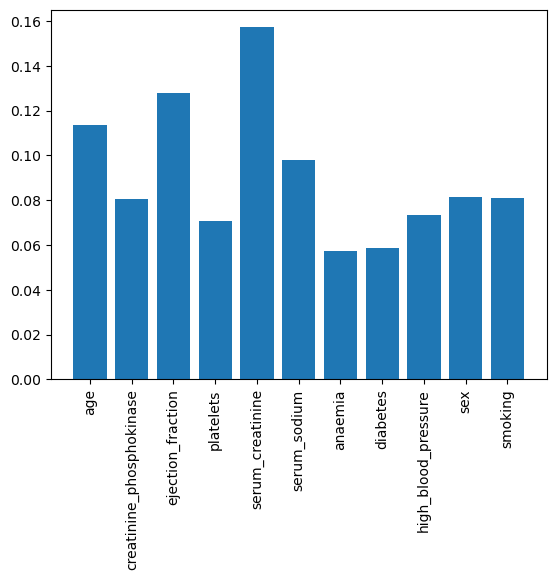

In [57]:
import matplotlib.pyplot as plt
plt.bar(X.columns, xgb.feature_importances_)
plt.xticks(rotation = 90)
plt.show()

### 7. 모델 학습 결과 심화 분석 

1. precision-recall 커브 확인

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


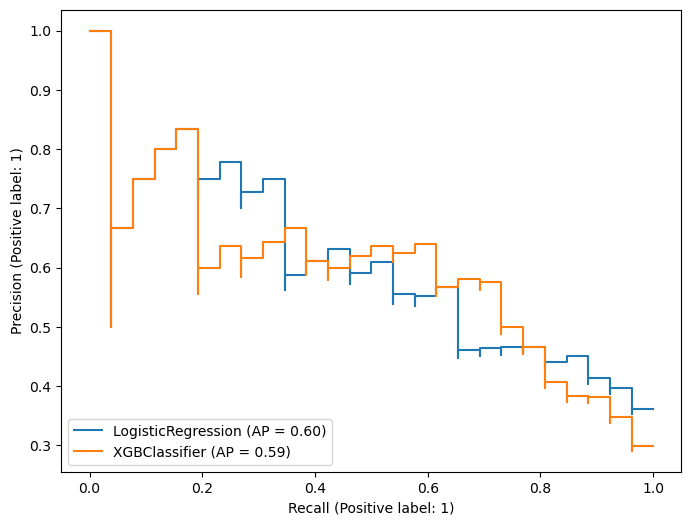

In [60]:
from sklearn.metrics import plot_precision_recall_curve
# 두 모델의 precision-recall 커브를 한 번에 그리기 
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plot_precision_recall_curve(lr, X_valid, y_valid, ax = ax)
plot_precision_recall_curve(xgb, X_valid, y_valid, ax = ax)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


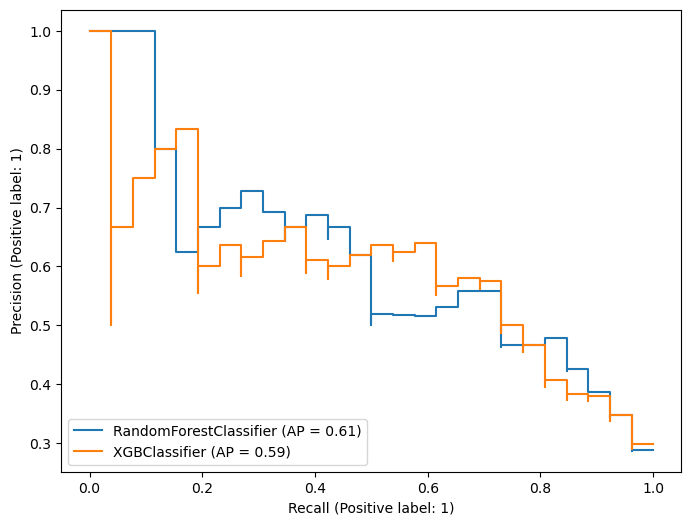

In [67]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plot_precision_recall_curve(rf, X_valid, y_valid, ax = ax)
plot_precision_recall_curve(xgb, X_valid, y_valid, ax = ax)

2. ROC커브 확인

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


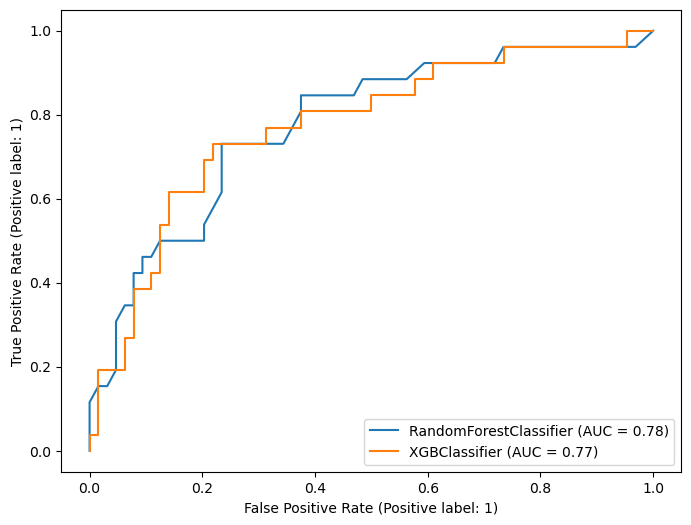

In [63]:
from sklearn.metrics import plot_roc_curve
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plot_roc_curve(rf, X_valid, y_valid, ax = ax)
plot_roc_curve(xgb, X_valid, y_valid, ax = ax)

c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
c:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


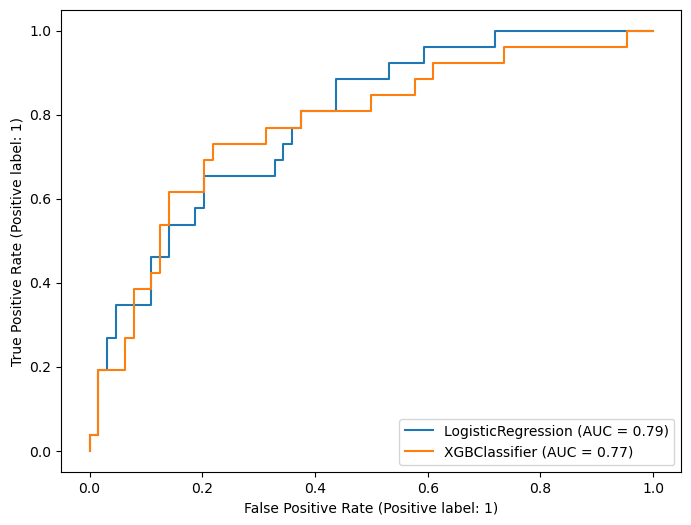

In [66]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca()
plot_roc_curve(lr, X_valid, y_valid, ax = ax)
plot_roc_curve(xgb, X_valid, y_valid, ax = ax)